In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.patches import Arc
import seaborn as sns
import math

In [2]:
def lat_con(lat):
    #y0 = 32.887444
    #y0 = 32.887423
    y0 = 32.887890643008
    output = ((lat - y0)*100000)
    return output

def long_con(long):
    #x0 = -117.2403311
    x0 = -117.24008563915
    #x0 = -117.240433
    
    output = (long - x0)*100000
    return output

def r(point, radians, origin=(0, 0)):
    """Rotate a point around a given point.
    
    I call this the "low performance" version since it's recalculating
    the same values more than once [cos(radians), sin(radians), x-ox, y-oy).
    It's more readable than the next function, though.
    """
    x, y = point
    ox, oy = origin

    qx = ox + math.cos(radians) * (x - ox) + math.sin(radians) * (y - oy)
    qy = oy + -math.sin(radians) * (x - ox) + math.cos(radians) * (y - oy)

    return qx, qy

In [3]:
%matplotlib notebook
from matplotlib.widgets import Slider  # import the Slider widget
import matplotlib.animation as animation

In [4]:
soccer_team = pd.DataFrame()
point_loma = ['Sophia Bruno 4286', 
           'Natalie Widmer 3527',
           'Natalie Saddic 5174',
           'Mikaela Celeste 4386',
           'Mia Bonifazi 3471',
           'Marissa Ray 3495',
           'Lucy Tang 4564',
           'Kelsey Kimball 4348',
           'Katherine Hottinger 3914',
           'Katelyn Meyer 4821',
           'Kameryn Hoban 4269',
           'Hana Law 4502',
           'Erika Braun 4796',
           'Emily Killeen 4568',
           'Delaney Whittet 4498',
           'Danielle Satterwhite 4784',
           'Christina Oddone 4663',
           'Caitlin McCarthy 4396',
           'Ashlynn Kolarik 4247',
           'Amanda Erickson 3701'
]

sonoma = ['Sophia Bruno 4286', 
           'Natalie Widmer 3527',
           'Natalie Saddic 5174',
           'Mikaela Celeste 4386',
           'Michelle Baddour 3966',
           'Mia Bonifazi 3471',
           'Marissa Ray 3495',
           'Lucy Tang 4564',
           'Kelsey Kimball 4348',
           'Katherine Hottinger 3914',
           'Katelyn Meyer 4821',
           'Kameryn Hoban 4269',
           'Hana Law 4502',
           'Erika Braun 4796',
           'Emily Killeen 4568',
           'Delaney Whittet 4498',
           'Danielle Satterwhite 4784',
           'Christina Oddone 4663',
           'Caitlin McCarthy 4396',
           'Ashlynn Kolarik 4247',
           'Amanda Erickson 3701'
]

In [5]:
for i in sonoma:
    csv_name = 'WSOC v Sonoma St Export for ' + str(i) + '.csv'
    data = pd.read_csv(csv_name, skiprows = 8)
    data = data[['Latitude', 'Longitude']]
    data['Player'] = str(i)
    data['Time'] = [x / 10 for x in range(0, data.shape[0])]
    soccer_team = soccer_team.append(data)

In [6]:
soccer_team.head()

,Latitude,Longitude,Player,Time
0,32.887902,-117.240098,Sophia Bruno 4286,0.0
1,32.887902,-117.240098,Sophia Bruno 4286,0.1
2,32.887902,-117.240098,Sophia Bruno 4286,0.2
3,32.887902,-117.240098,Sophia Bruno 4286,0.3
4,32.887902,-117.240098,Sophia Bruno 4286,0.4


In [7]:
def players_pitch(filename):
    filename['ConLat'] = filename.Latitude.apply(lat_con)
    filename['ConLong'] = filename.Longitude.apply(long_con)
    
    lat_list = []
    long_list = []
    for i in filename[['ConLat', 'ConLong']].values:
        a, b = r((i[0],i[1]), 3.0846278020723585, origin=(0,0))
        lat_list.append(a)
        long_list.append(b)
        
    filename.ConLat = lat_list
    filename.ConLong = long_list
        
    return filename
#rad:0.05696485147299

In [8]:
features = players_pitch(soccer_team)
features

,Latitude,Longitude,Player,Time,ConLat,ConLong
0,32.887902,-117.240098,Sophia Bruno 4286,0.0,-1.181418,1.120640
1,32.887902,-117.240098,Sophia Bruno 4286,0.1,-1.182557,1.140607
2,32.887902,-117.240098,Sophia Bruno 4286,0.2,-1.202524,1.139469
3,32.887902,-117.240098,Sophia Bruno 4286,0.3,-1.203094,1.149452
4,32.887902,-117.240098,Sophia Bruno 4286,0.4,-1.203094,1.149452
...,...,...,...,...,...,...
84255,32.888146,-117.239993,Amanda Erickson 3701,8425.5,-24.988522,-10.673926
84256,32.888146,-117.239994,Amanda Erickson 3701,8425.6,-24.991369,-10.624008
84257,32.888146,-117.239994,Amanda Erickson 3701,8425.7,-24.974248,-10.572950
84258,32.888146,-117.239995,Amanda Erickson 3701,8425.8,-24.955419,-10.551844


<IPython.core.display.Javascript object>


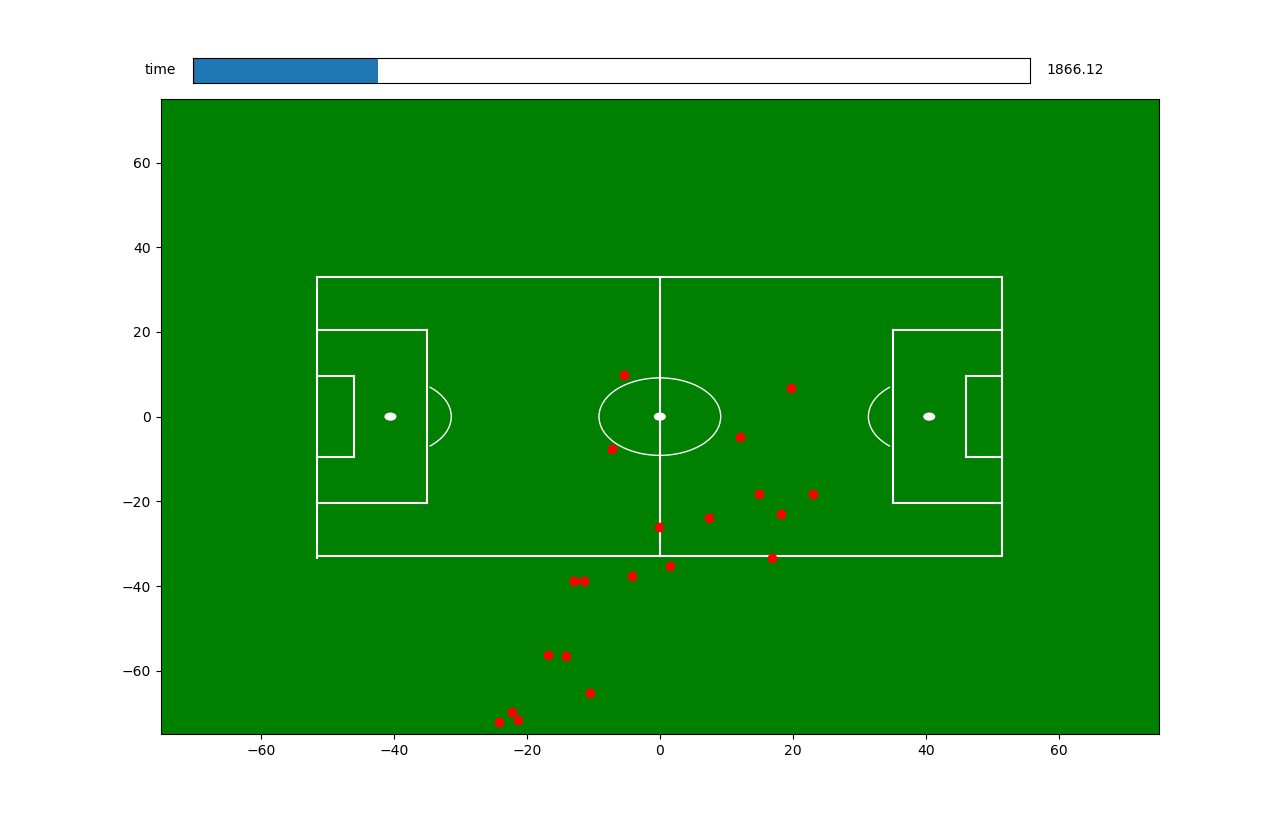

In [17]:
    #Create figure
    fig=plt.figure()
    fig.set_size_inches(25.75/2, 16.5/2)
    ax=fig.add_subplot(1,1,1)
    ax.set_facecolor("green")

    #Pitch Outline & Centre Line
    plt.plot([-51.5,-51.5],[-33.5,33], color="white")
    plt.plot([-51.5,51.5],[33,33], color="white")
    plt.plot([51.5,51.5],[33,-33], color="white")
    plt.plot([-51.5,51.5],[-33,-33], color="white")
    plt.plot([0,0],[-33,33], color="white")

    #Left Penalty Area
    plt.plot([-35,-35],[20.5,-20.5],color="white")
    plt.plot([-51.5,-35],[20.5,20.5],color="white")
    plt.plot([-35,-51.5],[-20.5,-20.5],color="white")

    #Right Penalty Area
    plt.plot([51.5,35],[20.5,20.5],color="white")
    plt.plot([35,35],[20.5,-20.5],color="white")
    plt.plot([35,51.5],[-20.5,-20.5],color="white")

    #Left 6-yard Box
    plt.plot([-51.5,-46],[9.5,9.5],color="white")
    plt.plot([-46,-46],[9.5,-9.5],color="white")
    plt.plot([-46,-51.5],[-9.5,-9.5],color="white")

    #Right 6-yard Box
    plt.plot([51.5,46],[9.5,9.5],color="white")
    plt.plot([46,46],[9.5,-9.5],color="white")
    plt.plot([46,51.5],[-9.5,-9.5],color="white")

    #Prepare Circles
    centreCircle = plt.Circle((0,0),9.15,color="white",fill=False)
    centreSpot = plt.Circle((0,0),0.8,color="white")
    leftPenSpot = plt.Circle((-40.5,0),0.8,color="white")
    rightPenSpot = plt.Circle((40.5,0),0.8,color="white")

    #Draw Circles
    ax.add_patch(centreCircle)
    ax.add_patch(centreSpot)
    ax.add_patch(leftPenSpot)
    ax.add_patch(rightPenSpot)

    #Prepare Arcs
    leftArc = Arc((-40.5,0),height=18.3,width=18.3,angle=0,theta1=310,theta2=50,color="white")
    rightArc = Arc((40.5,0),height=18.3,width=18.3,angle=0,theta1=130,theta2=230,color="white")

    #Draw Arcs
    ax.add_patch(leftArc)
    ax.add_patch(rightArc)
    
    
    start_time = 0
    end_time = features.Time.max()

    sax = plt.axes([0.15, 0.9, 0.65, 0.03])
    slide = Slider(sax, 'time', start_time, end_time, valinit=start_time)

    #Initial plot
    act_data = features.loc[features['Time'] == float(int(start_time))]
    ax.set_xlim([-75,75])
    ax.set_ylim([-75,75])
    s, = ax.plot(act_data.ConLong, act_data.ConLat, 'ro')

    def update(timestamp):
        act_data = features.loc[features['Time'] == float(int(timestamp))]
        X = act_data.ConLat
        Y = act_data.ConLong

        #Update data based on slider
        s.set_xdata(X)
        s.set_ydata(Y)


        fig.canvas.draw()

    #slide.on_changed(update)
    
    # Animation controls
    is_manual = False # True if user has taken control of the animation
    interval = 1000 # ms, time between animation frames
    loop_len = 5 # seconds per loop
    scale = interval/10  

    def update_slider(val):
        global is_manual
        is_manual=True
        update(val)



    def update_plot(num):
        global is_manual
        if is_manual:
            return l, # don't change

        val = (slide.val + scale) % slide.valmax
        slide.set_val(val)
        is_manual = False # the above line called update_slider, so we need to reset this
        return l,

    def on_click(event):
        # Check where the click happened
        (xm,ym),(xM,yM) = slide.label.clipbox.get_points()
        if xm < event.x < xM and ym < event.y < yM:
            # Event happened within the slider, ignore since it is handled in update_slider
            return
        else:
            # user clicked somewhere else on canvas = unpause
            global is_manual
            is_manual=False

    # call update function on slider value change
    slide.on_changed(update)

    fig.canvas.mpl_connect('button_press_event', on_click)

    ani = animation.FuncAnimation(fig, update_plot, interval=interval, blit=True)

    plt.show()

<IPython.core.display.Javascript object>


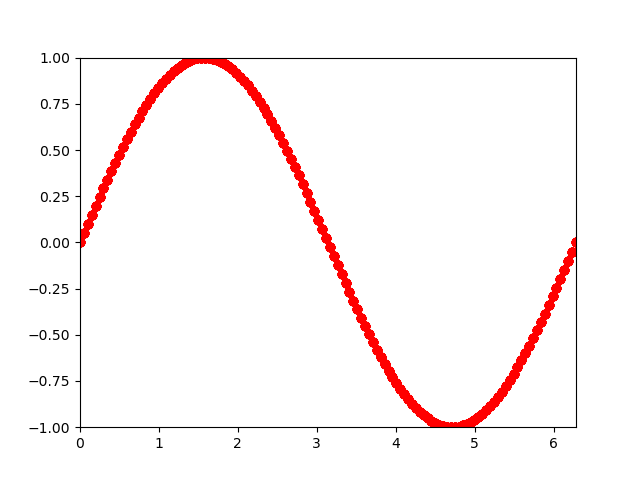

In [46]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

fig, ax = plt.subplots()
xdata, ydata = [], []
ln, = plt.plot([], [], 'ro')

def init():
    ax.set_xlim(0, 2*np.pi)
    ax.set_ylim(-1, 1)
    return ln,

def update(frame):
    xdata.append(frame)
    ydata.append(np.sin(frame))
    ln.set_data(xdata, ydata)
    return ln,

ani = FuncAnimation(fig, update, frames=np.linspace(0, 2*np.pi, 128),
                    init_func=init, blit=True)
plt.show()

In [15]:
np.linspace(0, 2*np.pi, 128)

array([0.        , 0.0494739 , 0.0989478 , 0.1484217 , 0.1978956 ,
       0.2473695 , 0.2968434 , 0.3463173 , 0.3957912 , 0.4452651 ,
       0.494739  , 0.5442129 , 0.5936868 , 0.6431607 , 0.6926346 ,
       0.7421085 , 0.7915824 , 0.8410563 , 0.8905302 , 0.9400041 ,
       0.989478  , 1.0389519 , 1.0884258 , 1.1378997 , 1.1873736 ,
       1.2368475 , 1.2863214 , 1.3357953 , 1.3852692 , 1.4347431 ,
       1.484217  , 1.5336909 , 1.5831648 , 1.6326387 , 1.6821126 ,
       1.7315865 , 1.7810604 , 1.8305343 , 1.8800082 , 1.9294821 ,
       1.978956  , 2.0284299 , 2.0779038 , 2.1273777 , 2.1768516 ,
       2.2263255 , 2.2757994 , 2.3252733 , 2.3747472 , 2.4242211 ,
       2.473695  , 2.5231689 , 2.5726428 , 2.6221167 , 2.6715906 ,
       2.7210645 , 2.7705384 , 2.8200123 , 2.8694862 , 2.9189601 ,
       2.968434  , 3.0179079 , 3.0673818 , 3.1168557 , 3.1663296 ,
       3.2158035 , 3.2652774 , 3.3147513 , 3.3642252 , 3.4136991 ,
       3.463173  , 3.5126469 , 3.5621208 , 3.6115947 , 3.66106